Create fisher information plots like in  
"Roesch, E., & Stumpf, M. P. H. (2019). Parameter inference in dynamical systems with co-dimension 1 bifurcations. *Royal Society Open Science, 6*(190747). [https://doi.org/10.1098/rsos.190747](https://royalsocietypublishing.org/doi/pdf/10.1098/rsos.190747)"

In [1]:
import sys
sys.path.append('C:/Users/lisah/Documents/Repos/ma-code')
from src.plots_ll_fish import *

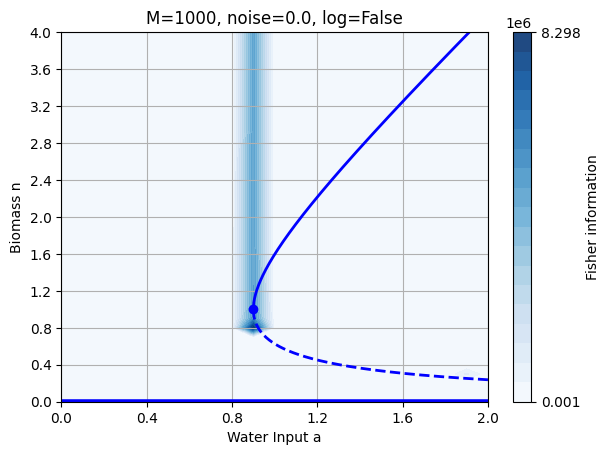

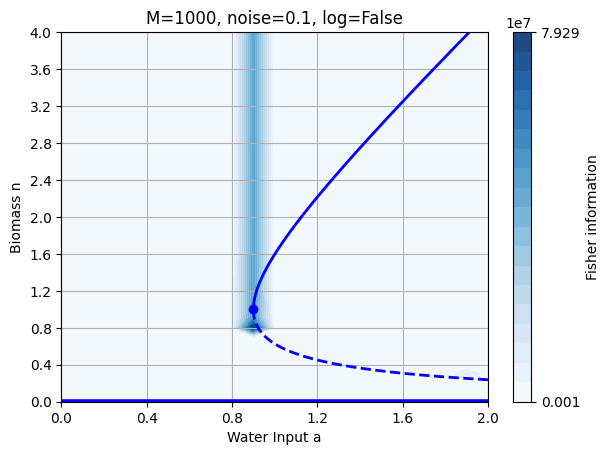

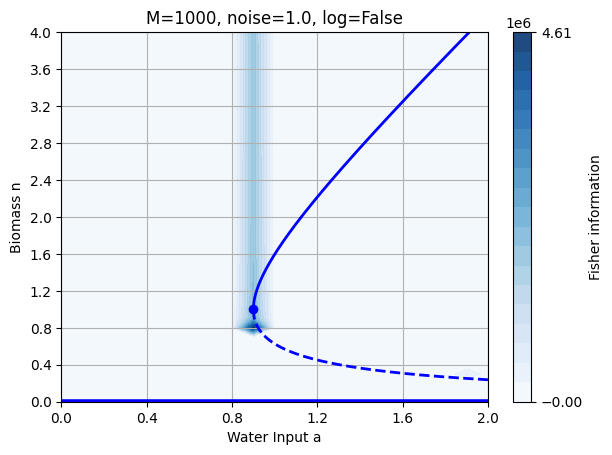

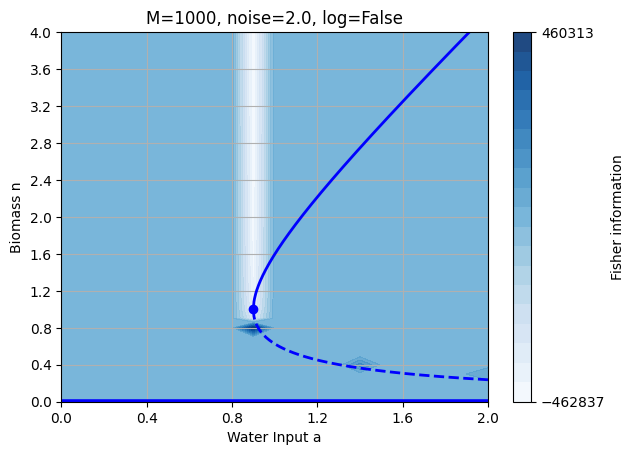

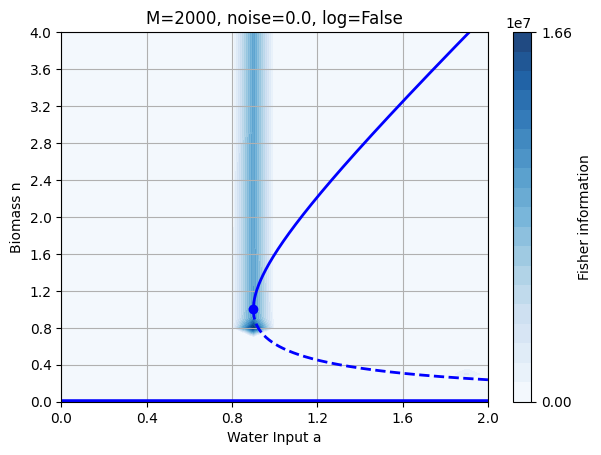

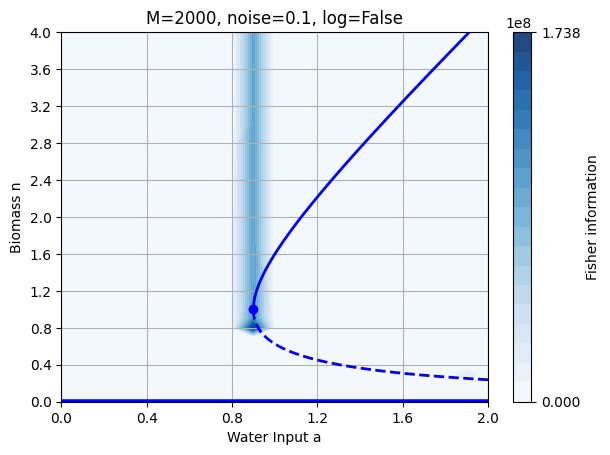

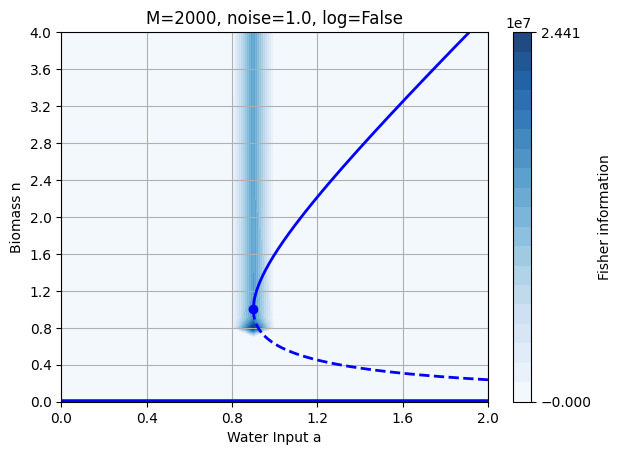

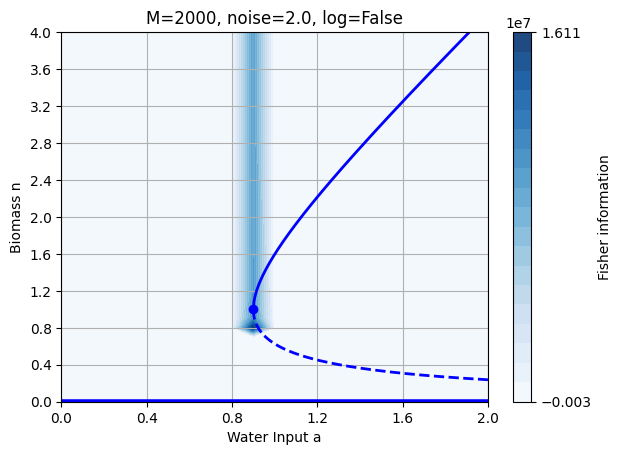

In [2]:
# generate all fisher plots

M_vals = [1000, 2000]
noise_vals = [0.0,0.1,1.0,2.0]
m = 0.45 # fix for now as given by literature
w0 = 0.95 # mean(a_vals)
store = False
logging = False

path_to_read= f"c:/Users/lisah/Documents/Repos/ma-code/data/t_fixed/fisher/t500/"
#path_to_read= f"c:/Users/lisah/Documents/Repos/ma-code/data/t_step0.5/fisher/"
path_to_store = f"c:/Users/lisah/Documents/Repos/ma-code/plots/fisher/m{m}/"

make_all_fish_plots(M_vals, noise_vals, w0, m, path_to_read, path_to_store, store, logging)

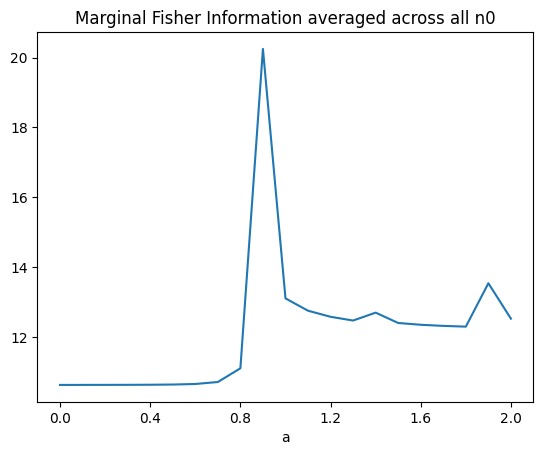

In [3]:
M = 1000
noise = 0.0

csv = read_fish_file(w0,m,M,noise, f"c:/Users/lisah/Documents/Repos/ma-code/data/fisher/m{m}/")
fig, ax = plt.subplots()
fi_avg_ic(fig, ax, csv)
#plt.savefig(f"c:/Users/lisah/Documents/Repos/ma-code/plots/fisher/m0.45/fish_ma_{w0}_{m}_{M}_{noise}.pdf", bbox_inches='tight')

(array([10]),)


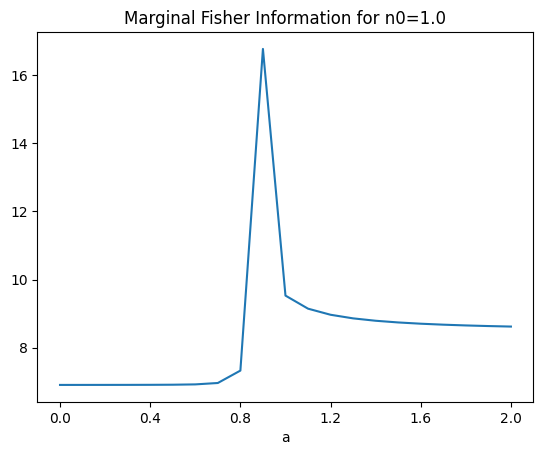

In [4]:
fig, ax = plt.subplots()
ic = 1.0
fi_ic(fig, ax, csv, ic)
#plt.savefig(f"c:/Users/lisah/Documents/Repos/ma-code/plots/fisher/m0.45/fish_m{ic}_{w0}_{m}_{M}_{noise}.pdf", bbox_inches='tight')

(array([4]),)


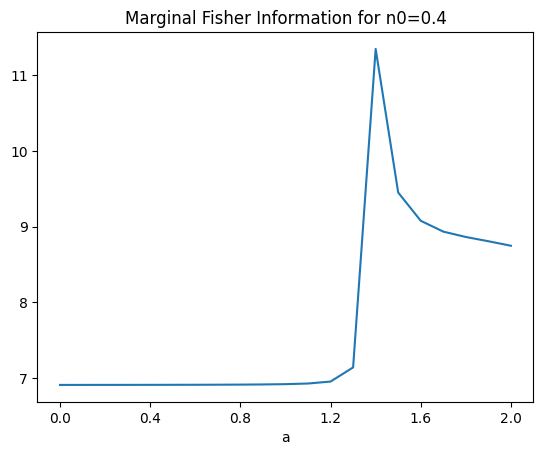

In [5]:
fig, ax = plt.subplots()
fi_ic(fig, ax, csv, 0.4)

(array([], dtype=int64),)


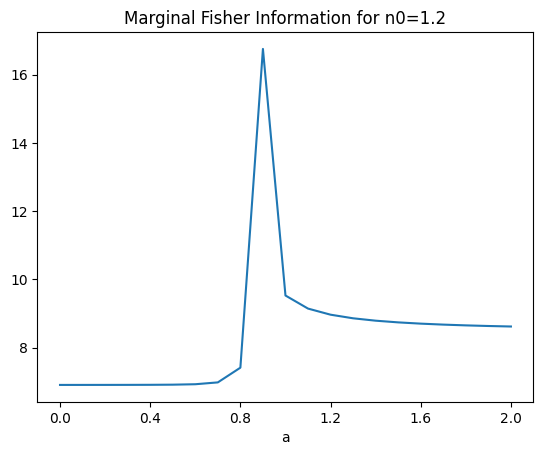

In [6]:
fig1, ax1 = plt.subplots()
fi_ic(fig1, ax1, csv, 1.2)